In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
import statsmodels.api as sm
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


In [4]:
data.shape

(13140, 176)

In [5]:
data.columns

Index(['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8',
       ...
       'absorbance165', 'absorbance166', 'absorbance167', 'absorbance168',
       'absorbance169', 'temperature', 'humidity', 'hdl_cholesterol_human',
       'hemoglobin(hgb)_human', 'cholesterol_ldl_human'],
      dtype='object', length=176)

In [6]:
tmp = pd.read_csv('Test.csv')

In [7]:
tmp.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance162,absorbance163,absorbance164,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity
0,ID_37BEI22R,0.449736,0.449798,0.447488,0.464694,0.466377,0.485350,0.488915,0.495073,0.504129,...,1.223793,1.195193,1.205222,1.164610,1.151594,1.166565,1.157079,1.200857,40.88,25.70
1,ID_4W85V5DV,0.495429,0.505488,0.510239,0.518880,0.533147,0.543142,0.551670,0.558261,0.564027,...,1.310219,1.294600,1.269705,1.244257,1.238365,1.218063,1.252711,1.255433,42.35,30.16
2,ID_L4YR3NDY,0.437904,0.439064,0.442527,0.450437,0.455363,0.465817,0.471249,0.479145,0.482595,...,1.162556,1.161711,1.160406,1.159570,1.159641,1.157491,1.177478,1.169607,42.83,25.51
3,ID_U88E3SQ6,0.495038,0.506246,0.508730,0.518995,0.529961,0.537583,0.539696,0.540400,0.547279,...,1.168321,1.137272,1.109380,1.047561,1.050649,1.020026,1.033139,1.023882,40.95,41.32
4,ID_NW7Z3XU7,0.531306,0.525309,0.535306,0.541387,0.551364,0.559821,0.564851,0.570824,0.577426,...,1.288590,1.287614,1.300164,1.285028,1.272818,1.277348,1.248892,1.290145,46.99,24.21


In [8]:
data.Reading_ID.nunique()

13140

In [9]:
data.isnull().any()

Reading_ID               False
absorbance0              False
absorbance1              False
absorbance2              False
absorbance3              False
                         ...  
temperature              False
humidity                 False
hdl_cholesterol_human    False
hemoglobin(hgb)_human    False
cholesterol_ldl_human    False
Length: 176, dtype: bool

In [10]:
# data['abs_95tile'] = data.iloc[:,1:170].quantile(0.95, axis=1)
# data['abs_5tile'] = data.iloc[:,1:170].quantile(0.05, axis=1)

In [11]:
# data['median'] = data.iloc[:,1:170].median(axis=1)

In [12]:
# data.head()

In [13]:
# median = data.pop('median')
# upper_percentile = data.pop('abs_95tile')
# lower_percentile = data.pop('abs_5tile')

# data.insert(171, 'abs_median', median)
# data.insert(172, 'abs_5tile', lower_percentile)
# data.insert(173, 'abs_95tile', upper_percentile)

In [14]:
# data.head()

In [15]:
# data.iloc[13100,1:170].T.plot.density(layout=(3, 4), figsize=(12, 12));

In [16]:
# data.iloc[0,1:170].T.plot.density(layout=(3, 4), figsize=(12, 12))
# data.iloc[13100,1:170].T.plot.density(layout=(3, 4), figsize=(12, 12));

In [17]:
# data.iloc[0:99,1:170].T.plot(kind='density', subplots=True, grid=True, layout=(10, 10), sharex=True, sharey=False, legend=False, figsize=(100, 50), linewidth=10);

# plt.gcf().suptitle('Sample of  100 IDs Absorbance Distribution',fontsize=100);


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

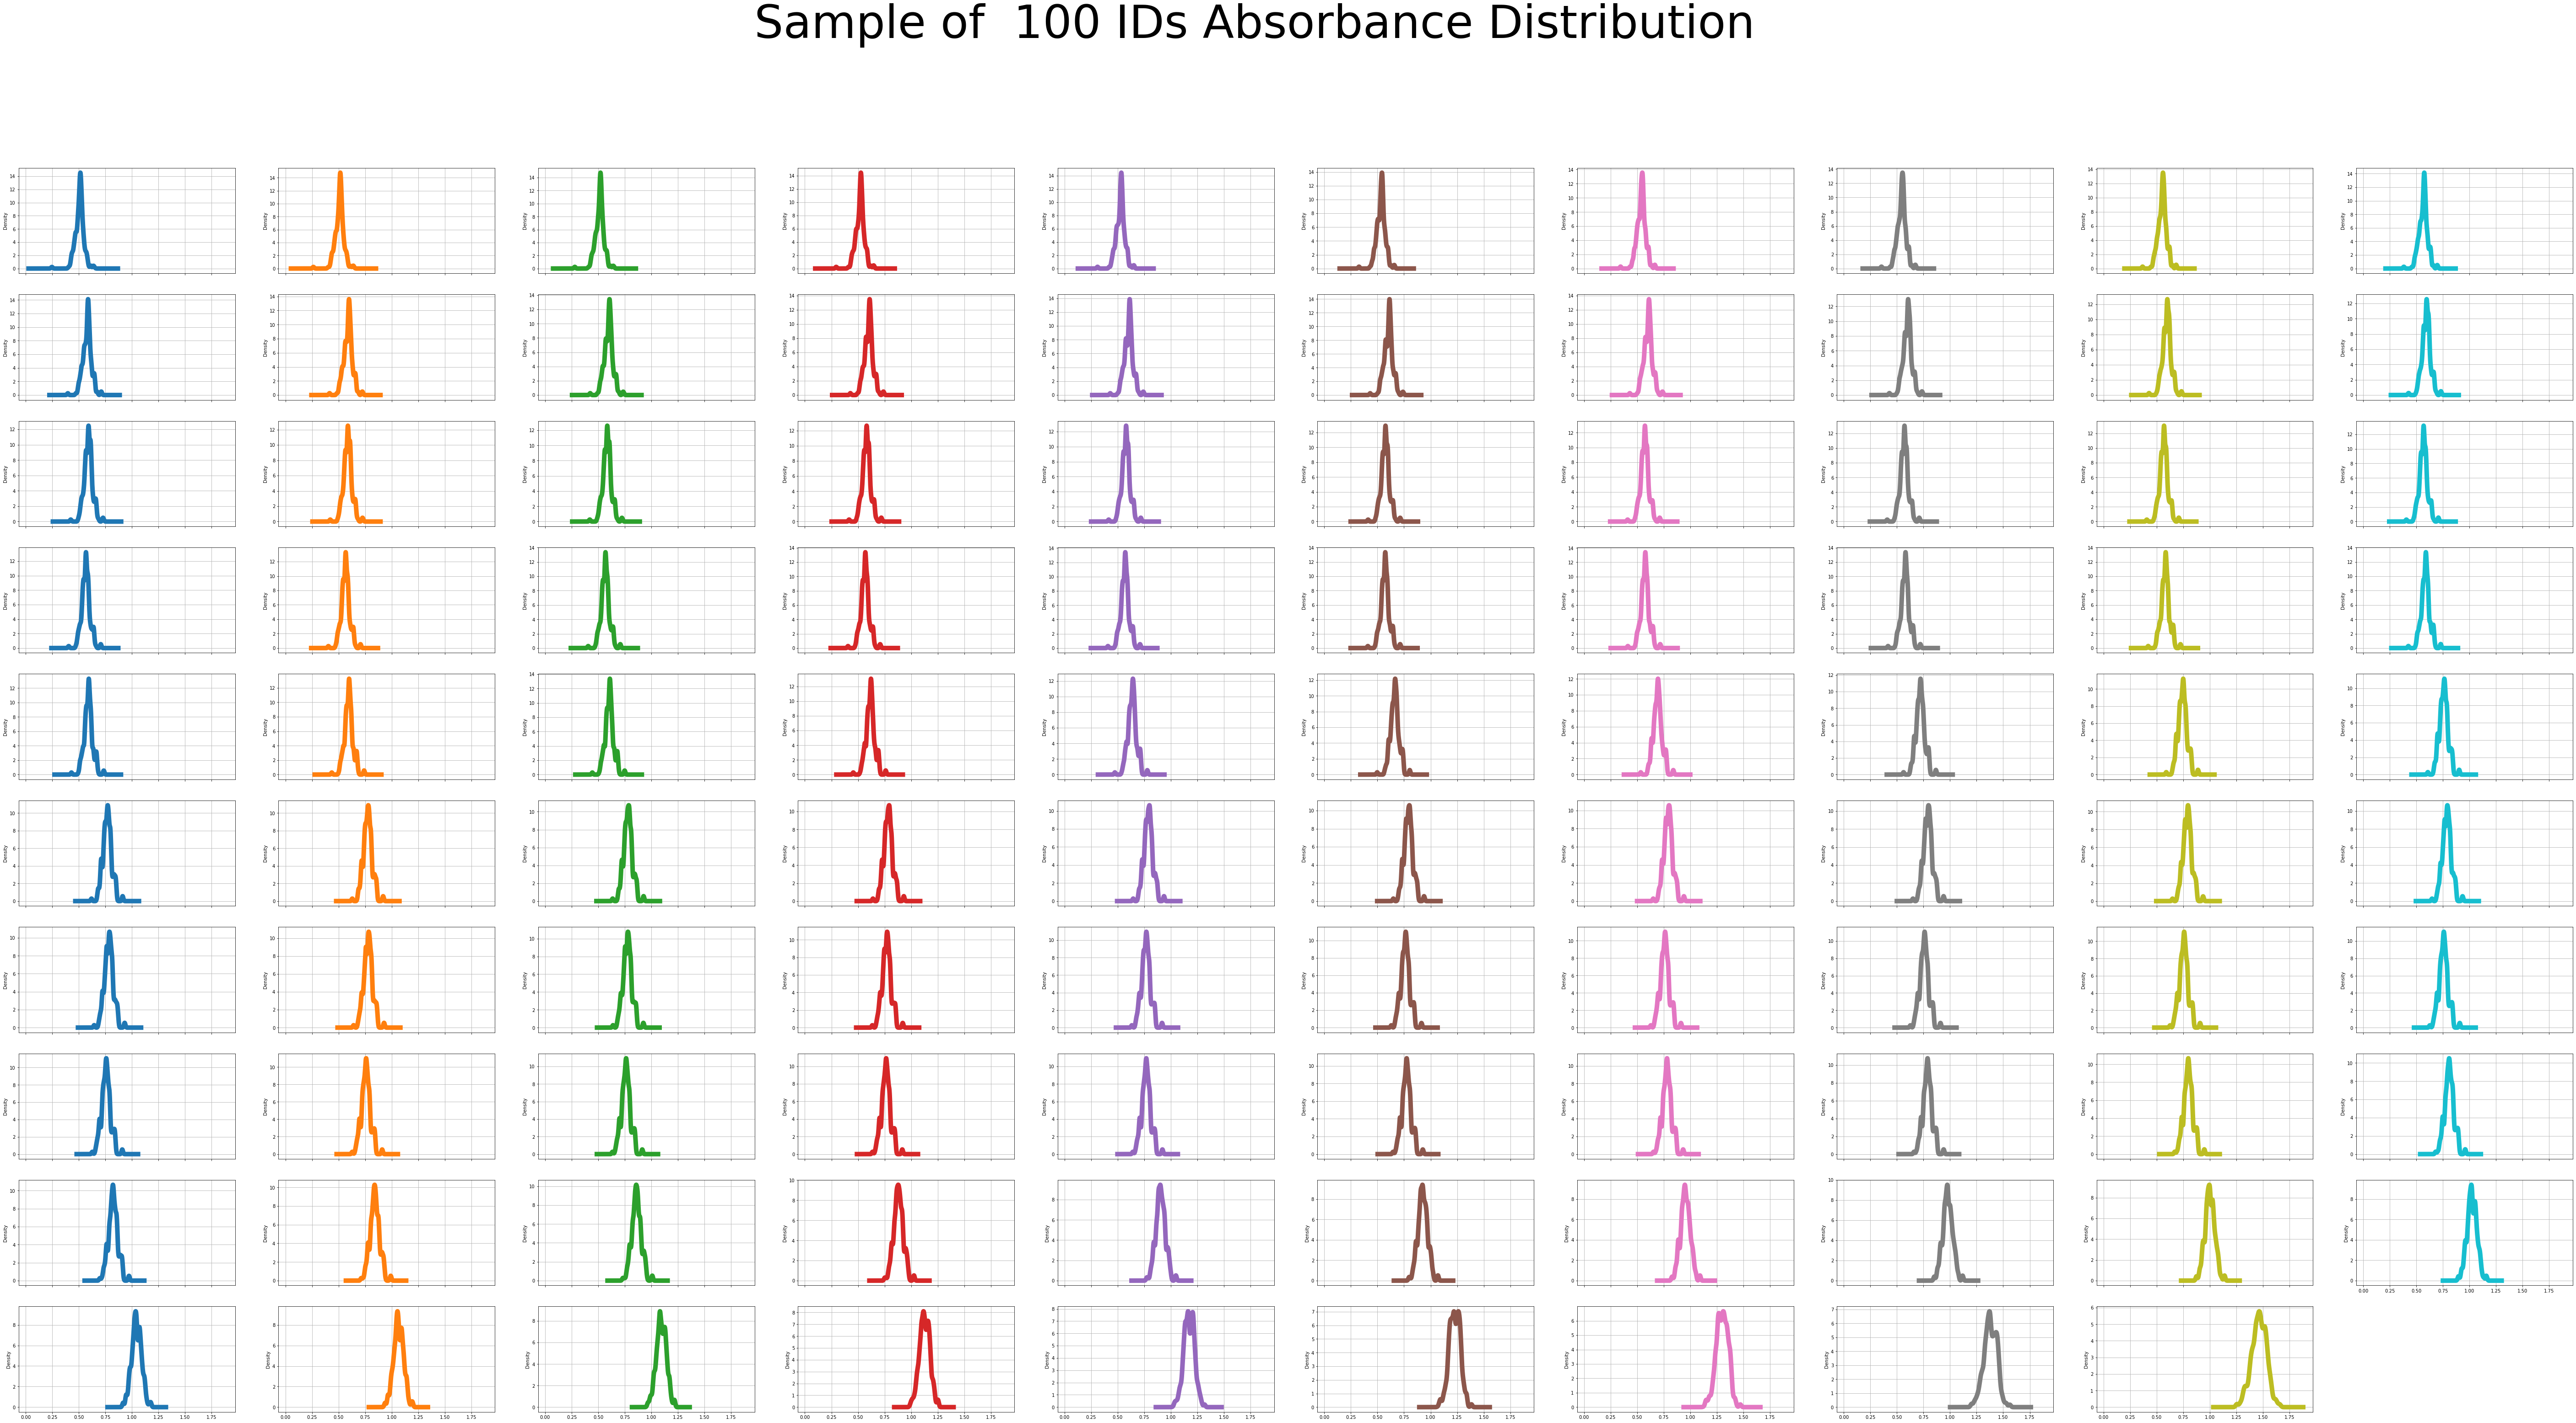

In [18]:
data.iloc[:,1:100].plot(kind='density', subplots=True, grid=True, layout=(10, 10), sharex=True, sharey=False, legend=False, figsize=(100, 50), linewidth=10);

plt.gcf().suptitle('Sample of  100 IDs Absorbance Distribution',fontsize=100);

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda/envs/azureml_py3

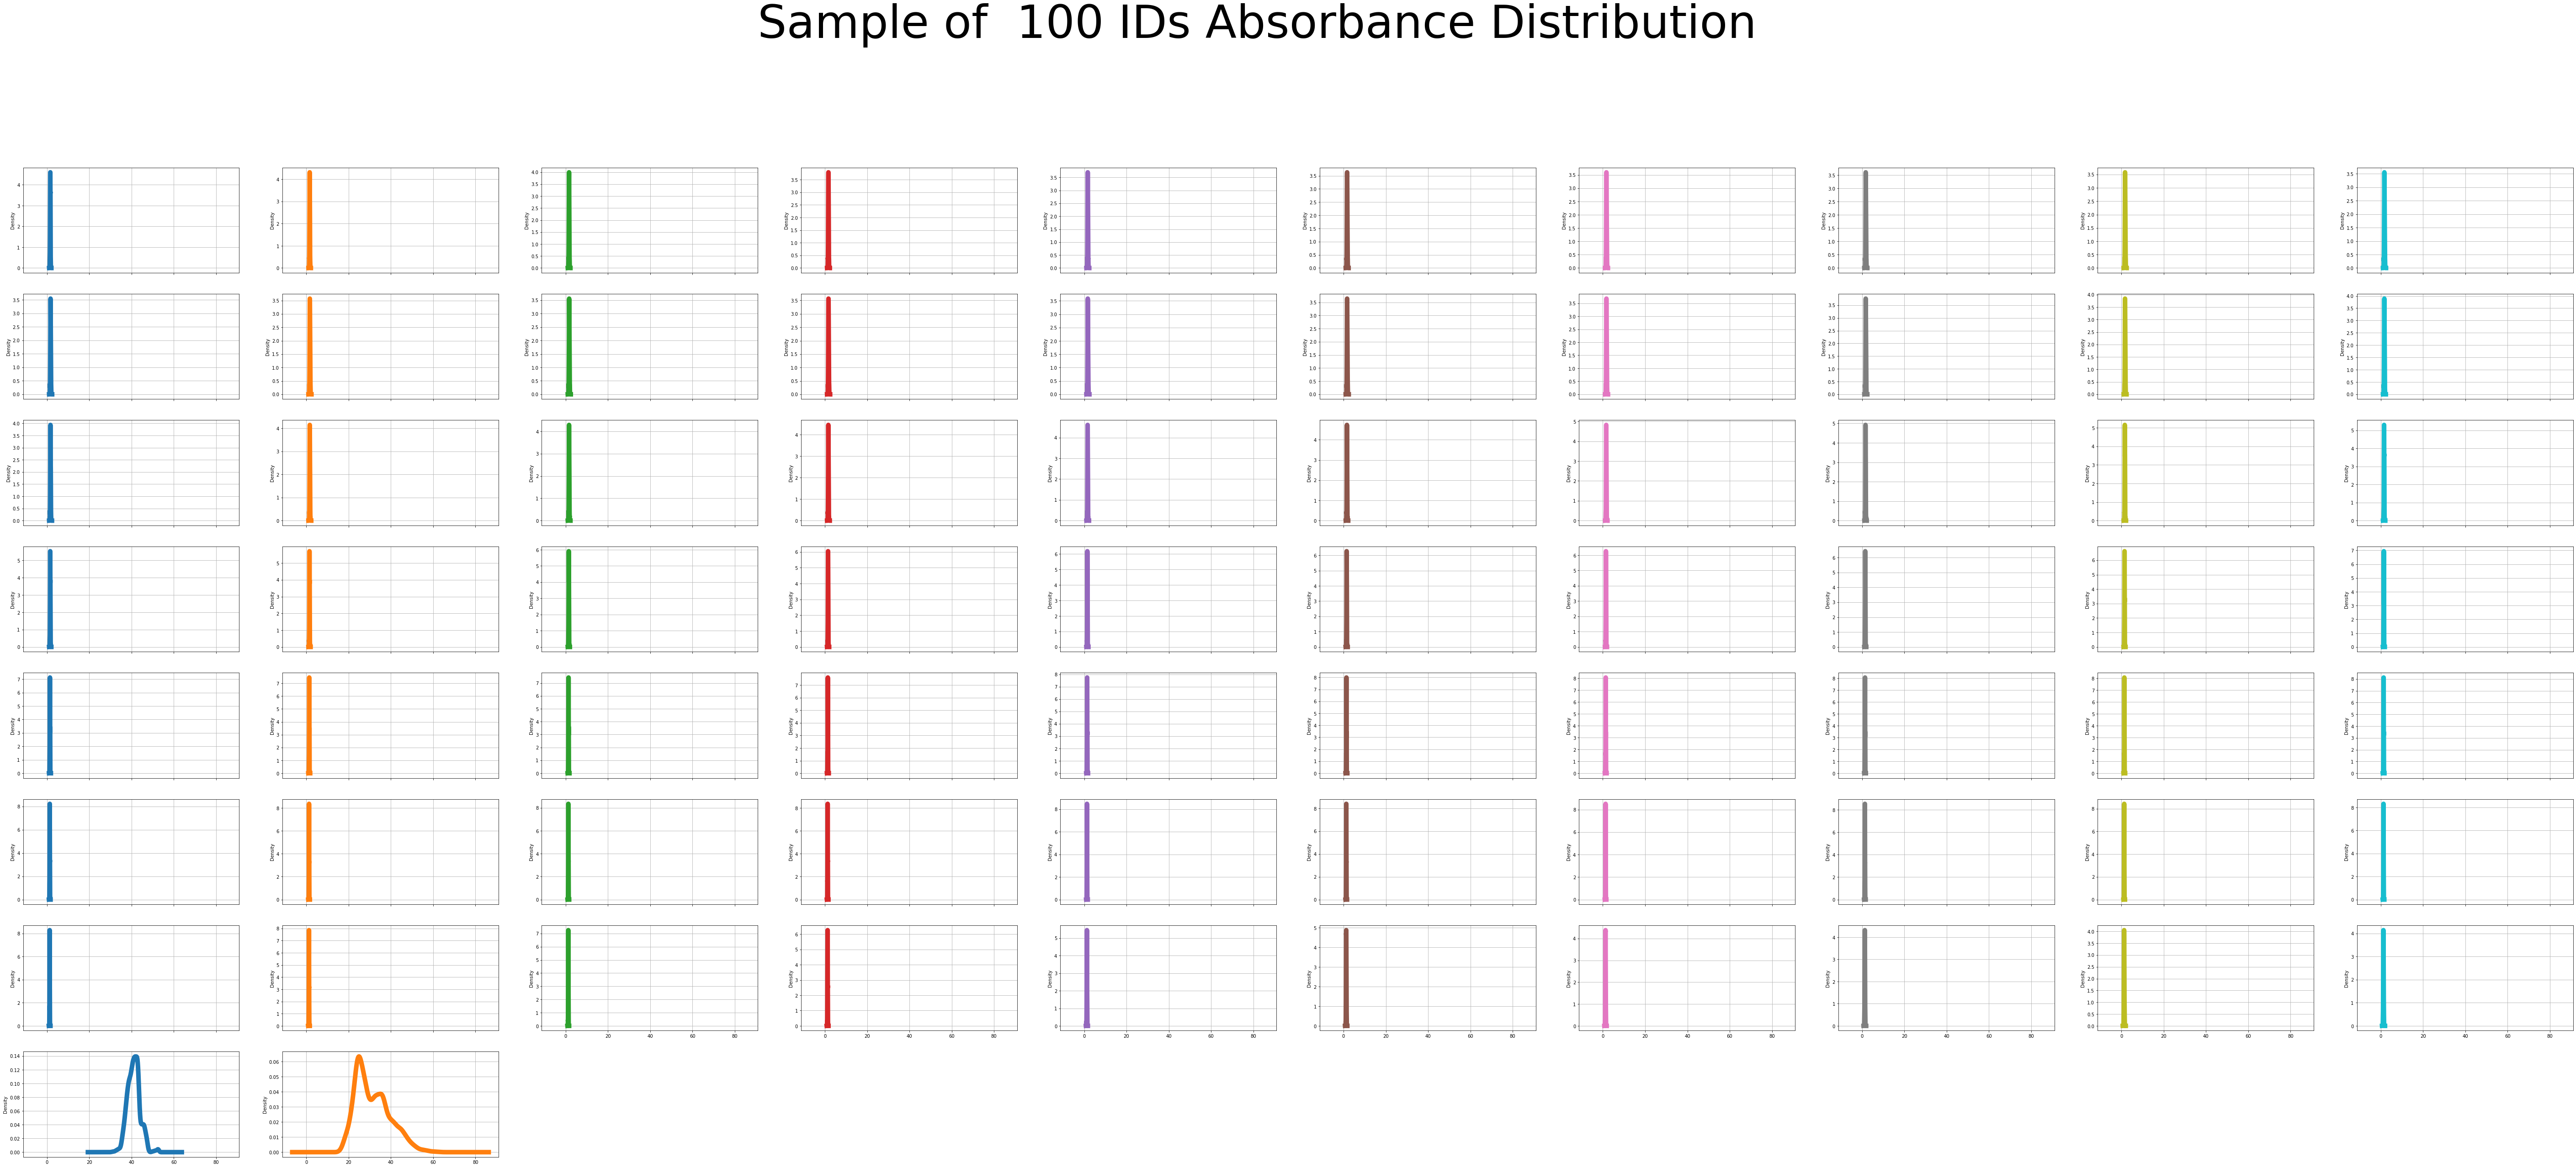

In [19]:
data.iloc[:,101:173].plot(kind='density', subplots=True, grid=True, layout=(10, 10), sharex=True, sharey=False, legend=False, figsize=(100, 50), linewidth=10);

plt.gcf().suptitle('Sample of  100 IDs Absorbance Distribution',fontsize=100);

In [20]:
# sm.qqplot(data.iloc[:,0], line ='45')
# pl.show()

In [21]:
data['hdl_cholesterol_human'].value_counts()

ok      7500
low     3060
high    2580
Name: hdl_cholesterol_human, dtype: int64

In [22]:
data = data.rename({'hemoglobin(hgb)_human': 'hemoglobin_human'}, axis=1)

In [23]:
# blood_levels = {'low': 1,
#                 'ok': 2,
#                 'high': 3}
# data['hdl_cholesterol_human_ord'] = data.hdl_cholesterol_human.map(blood_levels)
# data['hemoglobin_human_ord'] = data.hemoglobin_human.map(blood_levels)
# data['cholesterol_ldl_human_ord'] = data.cholesterol_ldl_human.map(blood_levels)

In [24]:
data.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high


In [25]:
#data_mod = data.drop(['Reading_ID', 'hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human'], axis=1)

In [26]:
# data_mod.head()

In [27]:
# Apply log transform to remove skewness in data
#data_mod.iloc[:,1:170] = data_mod.iloc[:,1:172].transform(np.log)
#data_temp = data.iloc[:,1:172].transform(np.log)

In [28]:
# data.head()

In [29]:
# Visualize data after log transform
#data_mod.iloc[0:99,1:170].T.plot(kind='density', subplots=True, grid=True, layout=(10, 10), sharex=True, sharey=False, legend=False, figsize=(100, 50), linewidth=10);
#data_temp.iloc[0:99,1:172].T.plot(kind='density', subplots=True, grid=True, layout=(10, 10), sharex=True, sharey=False, legend=False, figsize=(100, 50), linewidth=10);


#plt.gcf().suptitle('Sample of  100 IDs Absorbance Distribution',fontsize=100);

In [30]:
# sm.qqplot(data_temp.iloc[:,0], line ='45')
# pl.show()

In [31]:
#data_mod.iloc[:, 1:170].apply(pd.Series.describe, axis=1)
data.iloc[:, 1:170].apply(pd.Series.describe, axis=1)

,count,mean,std,min,25%,50%,75%,max
0,169.0,1.030401,0.440008,0.477423,0.572561,0.862428,1.404205,1.779920
1,169.0,1.077086,0.480405,0.471537,0.576763,0.903146,1.488043,1.883058
2,169.0,1.033659,0.448056,0.444998,0.557174,0.874080,1.453174,1.717370
3,169.0,1.026682,0.407707,0.513303,0.605267,0.868044,1.375741,1.681455
4,169.0,1.036452,0.377370,0.510485,0.629276,0.918354,1.388843,1.603991
...,...,...,...,...,...,...,...,...
13135,169.0,1.001647,0.396157,0.482732,0.579502,0.874325,1.342472,1.635065
13136,169.0,1.104263,0.456006,0.525435,0.622114,0.944262,1.518922,1.826468
13137,169.0,1.095590,0.441808,0.512718,0.626705,0.938767,1.487541,1.802633
13138,169.0,0.965183,0.370551,0.456747,0.564752,0.846931,1.322705,1.513675


In [32]:
# upper_percentile = data_mod.iloc[:,1:170].quantile(0.95, axis=1)
# lower_percentile = data_mod.iloc[:,1:170].quantile(0.05, axis=1)
# median = data_mod.iloc[:,1:170].median(axis=1)
# mean = data_mod.iloc[:,1:170].median(axis=1)
# min_abs = data_mod.iloc[:,1:170].min(axis=1)
# max_abs = data_mod.iloc[:,1:170].max(axis=1)
# quarter_percentile = data_mod.iloc[:,1:170].quantile(0.25, axis=1)
# fifty_percentile = data_mod.iloc[:,1:170].quantile(0.5, axis=1)
# thirdqtr_percentile = data_mod.iloc[:,1:170].quantile(0.75, axis=1)
# std_abs = data_mod.iloc[:,1:170].std(axis=1)

# data_mod.insert(171, 'abs_mean', mean)
# data_mod.insert(172, 'abs_median', median)
# data_mod.insert(173, 'abs_std', std_abs)
# data_mod.insert(174, 'abs_min', min_abs)
# data_mod.insert(175, 'abs_5%', lower_percentile)
# data_mod.insert(176, 'abs_25%', quarter_percentile)
# data_mod.insert(177, 'abs_50%', fifty_percentile)
# data_mod.insert(178, 'abs_75%', thirdqtr_percentile)
# data_mod.insert(179, 'abs_95%', upper_percentile)
# data_mod.insert(180, 'abs_max', max_abs)

In [33]:
upper_percentile = data.iloc[:,1:170].quantile(0.95, axis=1)
lower_percentile = data.iloc[:,1:170].quantile(0.05, axis=1)
median = data.iloc[:,1:170].median(axis=1)
mean = data.iloc[:,1:170].median(axis=1)
min_abs = data.iloc[:,1:170].min(axis=1)
max_abs = data.iloc[:,1:170].max(axis=1)
quarter_percentile = data.iloc[:,1:170].quantile(0.25, axis=1)
fifty_percentile = data.iloc[:,1:170].quantile(0.5, axis=1)
thirdqtr_percentile = data.iloc[:,1:170].quantile(0.75, axis=1)
std_abs = data.iloc[:,1:170].std(axis=1)

data.insert(171, 'abs_mean', mean)
data.insert(172, 'abs_median', median)
data.insert(173, 'abs_std', std_abs)
data.insert(174, 'abs_min', min_abs)
data.insert(175, 'abs_5%', lower_percentile)
data.insert(176, 'abs_25%', quarter_percentile)
data.insert(177, 'abs_50%', fifty_percentile)
data.insert(178, 'abs_75%', thirdqtr_percentile)
data.insert(179, 'abs_95%', upper_percentile)
data.insert(180, 'abs_max', max_abs)

In [34]:
data.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,abs_25%,abs_50%,abs_75%,abs_95%,abs_max,temperature,humidity,hdl_cholesterol_human,hemoglobin_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,0.572561,0.862428,1.404205,1.758806,1.779920,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,0.576763,0.903146,1.488043,1.858172,1.883058,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,0.557174,0.874080,1.453174,1.699928,1.717370,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,0.605267,0.868044,1.375741,1.671817,1.681455,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,0.629276,0.918354,1.388843,1.585130,1.603991,38.92,23.88,ok,ok,high


In [35]:
# Write modified dataframe to file for model development
data.to_csv('mod_train.csv', index=False)

In [36]:
# Split in to X and Y
# X = data.drop(['Reading_ID','hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human'], axis=1)
# Y = data[['hdl_cholesterol_human', 'hemoglobin_human', 'cholesterol_ldl_human']]

In [37]:
# X.head()

In [38]:
# Y.head()

In [39]:
# Label encoder for Target variables
# le = LabelEncoder()
# Y_enc = Y.apply(le.fit_transform)

In [40]:
# Y_enc.head()

In [41]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y_enc,test_size=0.3,random_state=27)
# X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=27)

In [42]:
# Normalization of X

# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
#Normalization is good to use when you know that the distribution of your data does not follow a 
#Gaussian distribution. 
#This can be useful in algorithms that do not assume any distribution of the data like 
#K-Nearest Neighbors and Neural Networks.
#Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. 
#However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a 
#bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
#If the distribution of the quantity is normal, then it should be standardized, otherwise the data should 
#be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001).

# from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
# norm = MinMaxScaler().fit(X_train)

# transform training data
# X_train_norm = norm.transform(X_train)

# transform validation data
# X_val_norm = norm.transform(X_val)

# transform test data
# X_test_norm = norm.transform(X_test)


In [43]:
# X_train_norm

In [44]:
# sm.qqplot(X_train_norm, line ='45')
# pl.show()

In [45]:
# Y_train